In [31]:
import warnings
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
import os

path = '../ad_examples/ad_examples/datasets/anomaly/'

files = []
for _, _, filenames in os.walk(path):
    for filename in filenames:
        if "_1.csv" in filename and filename != 'toy2_1.csv':
            files.append(filename[:-6] + '/fullsamples/' + filename)

In [33]:
import tensorflow as tf
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [34]:
columns = ['RF', 'GNB', 'LogR', 'ABC', 'SVM', 'KNN', 'BagC', 'XGB', 'MLP', 'Dataset Name']
np.random.seed(seed=10)
auc_df = pd.DataFrame(columns=columns)
acc_df = pd.DataFrame(columns=columns)
f1_df = pd.DataFrame(columns=columns)
cnt_df = pd.DataFrame(columns=columns)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for file in files:
        accuracies = []
        aucs = []
        f1s = []
        cnts = []

        path1 = '../train_test_split/'
        file = file.split('/')[-1][:-6]

        X_train = pd.read_csv(path1 + file + '_X_train.csv', header=None).values
        y_train = pd.read_csv(path1 + file + '_y_train.csv', header=None).values
        X_test = pd.read_csv(path1 + file + '_X_test.csv', header=None).values
        y_test = pd.read_csv(path1 + file + '_y_test.csv', header=None).values

        from sklearn.ensemble import RandomForestClassifier

        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        from sklearn.naive_bayes import GaussianNB

        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        y_pred = gnb.predict(X_test)
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        from sklearn.linear_model import LogisticRegression

        logreg = LogisticRegression()
        logreg.fit(X_train,y_train)
        y_pred=logreg.predict(X_test)
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        from sklearn.ensemble import AdaBoostClassifier

        abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
        model = abc.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        from sklearn import svm

        clf = svm.SVC()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        from sklearn.neighbors import KNeighborsClassifier

        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        from sklearn.ensemble import BaggingClassifier

        bagging_rf = BaggingClassifier(RandomForestClassifier(), max_samples=0.5, max_features=0.5)
        bagging_rf.fit(X_train, y_train)
        y_pred = bagging_rf.predict(X_test)
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        import xgboost as xgb

        xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
        xgb.fit(X_train, y_train)
        y_pred = bagging_rf.predict(X_test)
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        import numpy as np
        from keras.models import Sequential
        from keras.layers import Dense, Dropout

        mlp = Sequential()
        mlp.add(Dense(64, activation='relu'))
        mlp.add(Dropout(0.5))
        mlp.add(Dense(64, activation='relu'))
        mlp.add(Dropout(0.5))
        mlp.add(Dense(1, activation='sigmoid'))

        mlp.compile(loss='binary_crossentropy',
                      optimizer='rmsprop',
                      metrics=[auc])

        mlp.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0)

        y_pred = [i[0].astype(int) for i in mlp.predict(X_test)]
        
        cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
        accuracies.append(metrics.accuracy_score(y_test, y_pred))
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
        f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))

        accuracies.append(file.split('/')[-1][:-6])
        acc_df.loc[-1] = accuracies
        acc_df.index = acc_df.index + 1
        acc_df = acc_df.sort_index()

        aucs.append(file.split('/')[-1][:-6])
        auc_df.loc[-1] = aucs
        auc_df.index = auc_df.index + 1
        auc_df = auc_df.sort_index()

        f1s.append(file.split('/')[-1][:-6])
        f1_df.loc[-1] = f1s
        f1_df.index = f1_df.index + 1
        f1_df = f1_df.sort_index()
        
        cnts.append(file.split('/')[-1][:-6])
        cnt_df.loc[-1] = cnts
        cnt_df.index = cnt_df.index + 1
        cnt_df = cnt_df.sort_index()

In [35]:
def plots(df, ylabel, tit):
    df.boxplot(return_type='axes', figsize=(20,8))
    plt.ylabel(ylabel)
    plt.title(tit)
    plt.savefig(tit+'.png')
    plt.close()

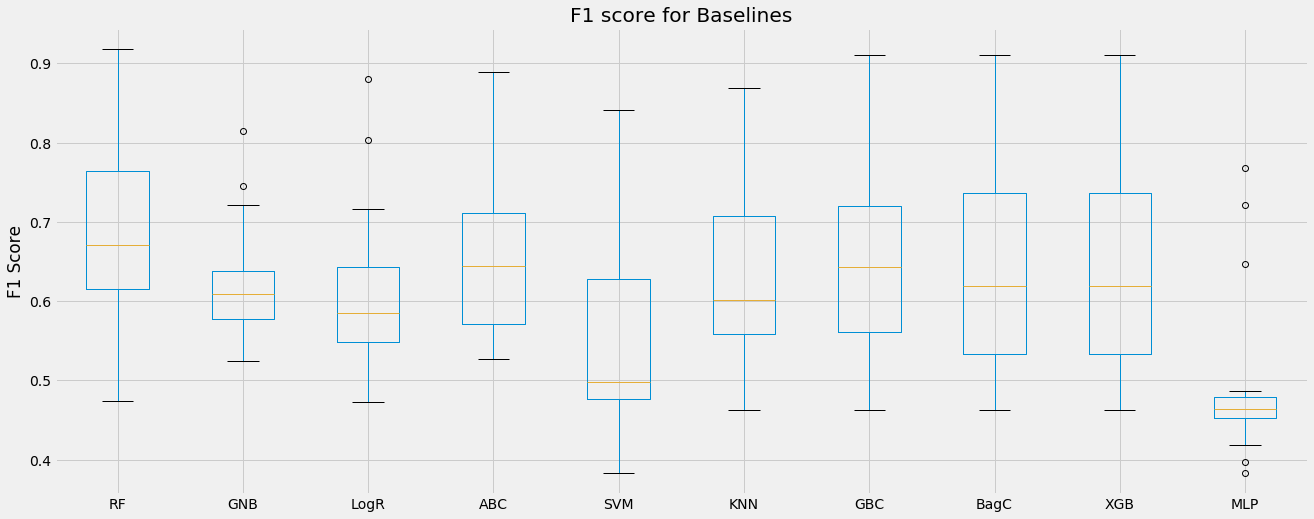

In [111]:
plots(f1_df, 'F1 Score', 'F1 score for Baselines')

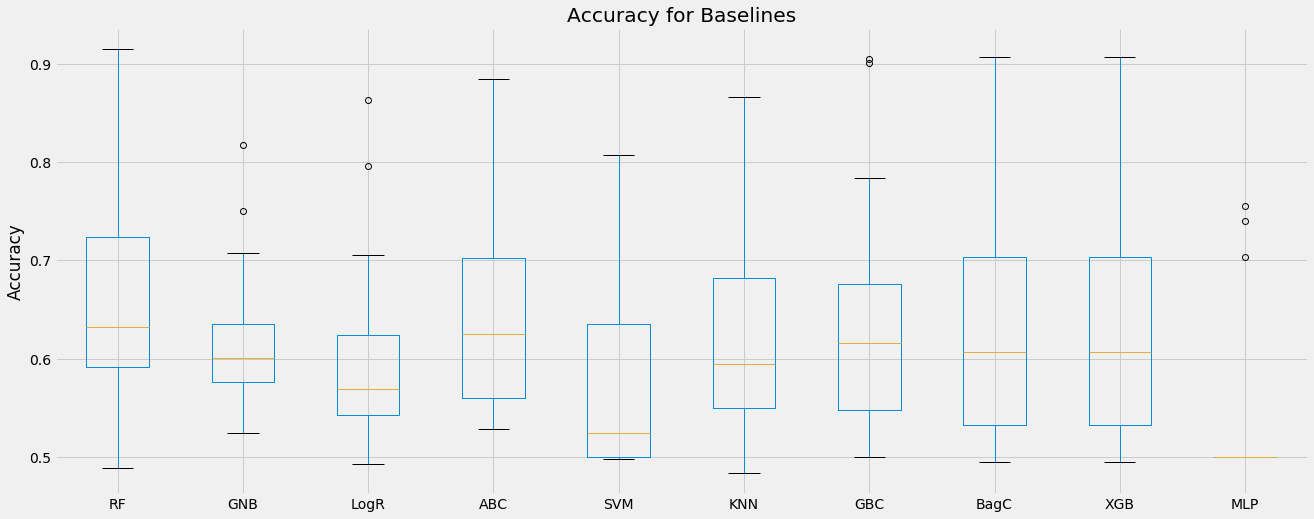

In [112]:
plots(acc_df, 'Accuracy', 'Accuracy for Baselines')

In [36]:
plots(auc_df, 'AUC score', 'AUC Score for Baselines')

In [37]:
auc_df

RF       GNB      LogR       ABC       SVM       KNN      BagC  \
0   0.902767  0.814690  0.902955  0.925302  0.857699  0.882522  0.910175   
1   0.743457  0.608965  0.628991  0.689318  0.610528  0.648495  0.734725   
2   0.554657  0.611526  0.534161  0.545303  0.514925  0.510512  0.521758   
3   0.638987  0.602298  0.584933  0.624668  0.584780  0.627562  0.593789   
4   0.686321  0.592767  0.539308  0.621069  0.551887  0.557390  0.593553   
5   0.771451  0.690092  0.679670  0.729161  0.656266  0.692738  0.769368   
6   0.590798  0.605025  0.546918  0.563234  0.500000  0.542813  0.555098   
7   0.616997  0.657858  0.593622  0.600703  0.516043  0.625019  0.599764   
8   0.580694  0.547197  0.534502  0.540787  0.510621  0.549208  0.551031   
9   0.919045  0.602642  0.799654  0.891382  0.814106  0.854024  0.884980   
10  0.620883  0.660933  0.586743  0.590183  0.500000  0.606361  0.618389   
11  0.703263  0.673660  0.627273  0.619347  0.738695  0.733333  0.703030   
12  0.605000  0.635000  0.590000  0.593750  0.498750  0.571250  0.545000   
13  0.548789  0.597222  0.551519  0.563746  0.498457  0.529202  0.561135   

         XGB       MLP       Dataset Name  
0   0.910175  0.764752               xala  
1   0.734725  0.500000                     
2   0.521758  0.500000                     
3   0.593789  0.500000                     
4   0.593553  0.500000                     
5   0.769368  0.500000                     
6   0.555098  0.500000        Mylyn-CK-11  
7   0.599764  0.500000                     
8   0.551031  0.500000                     
9   0.884980  0.766707            eclipse  
10  0.618389  0.500000          eclipse34  
11  0.703030  0.613520  Eclipse-PDE-CK-11  
12  0.545000  0.500000  Eclipse-JDT-CK-11  
13  0.561135  0.500000               came

In [49]:
plt.style.use('fivethirtyeight')
for file in files:
    file = file.split('/')[-1][:-6]
    title = ylabel + ' ' + file
    ax = f1_df.set_index('Dataset Name').T[file].plot.bar(figsize=(20,8), rot=0, title=title)
    ax.set_xlabel(file)
    ax.set_ylabel(ylabel)
    plt.savefig(title+'.png')
    plt.close()

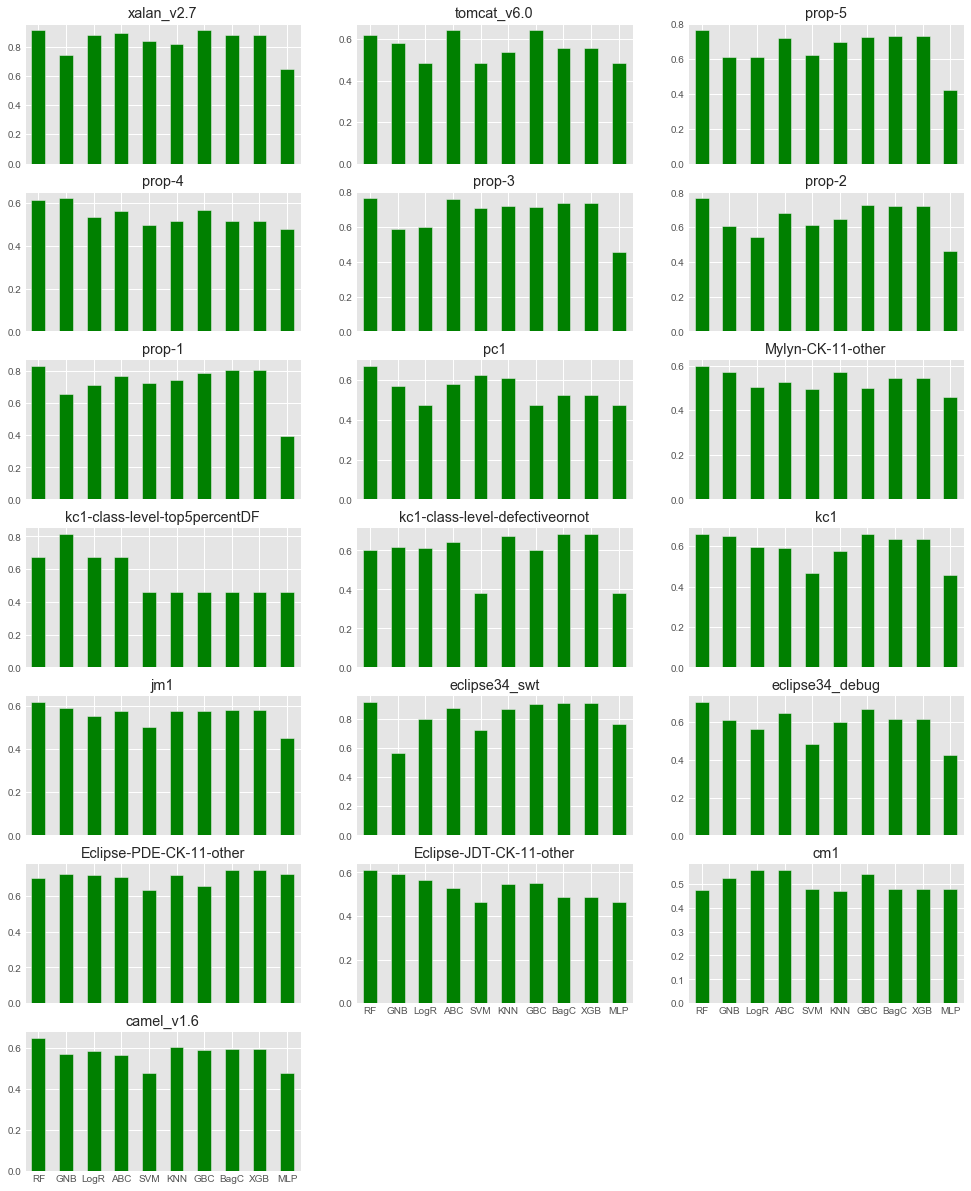

In [88]:
plt.style.use('ggplot')
ax = f1_df.set_index('Dataset Name').T.plot.bar(subplots=True, figsize=(15,60), layout=(21,3), legend=False, color='green', rot=0)

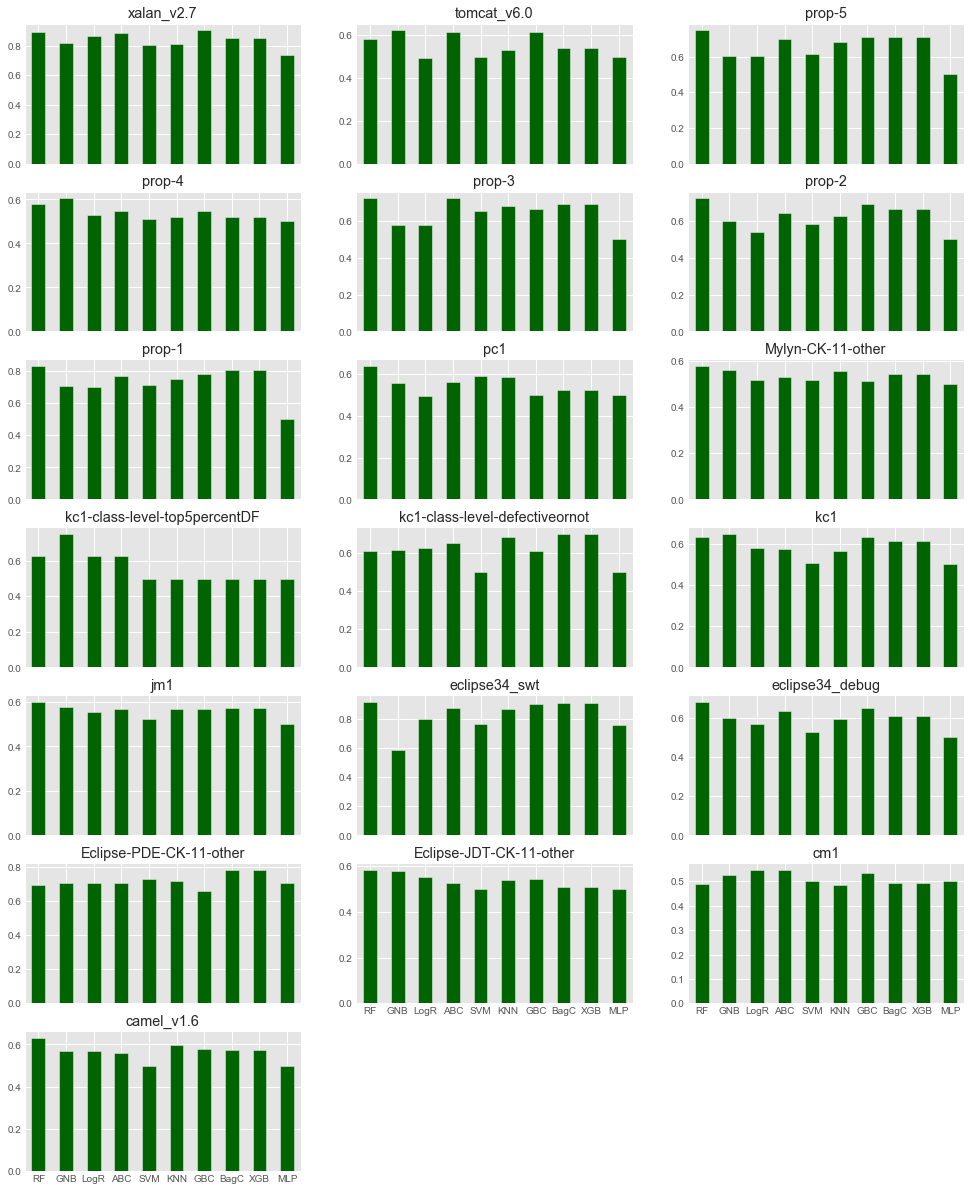

In [93]:
plt.style.use('ggplot')
ax = acc_df.set_index('Dataset Name').T.plot.bar(subplots=True, figsize=(15,60), layout=(21,3), legend=False, color='darkgreen', rot=0)

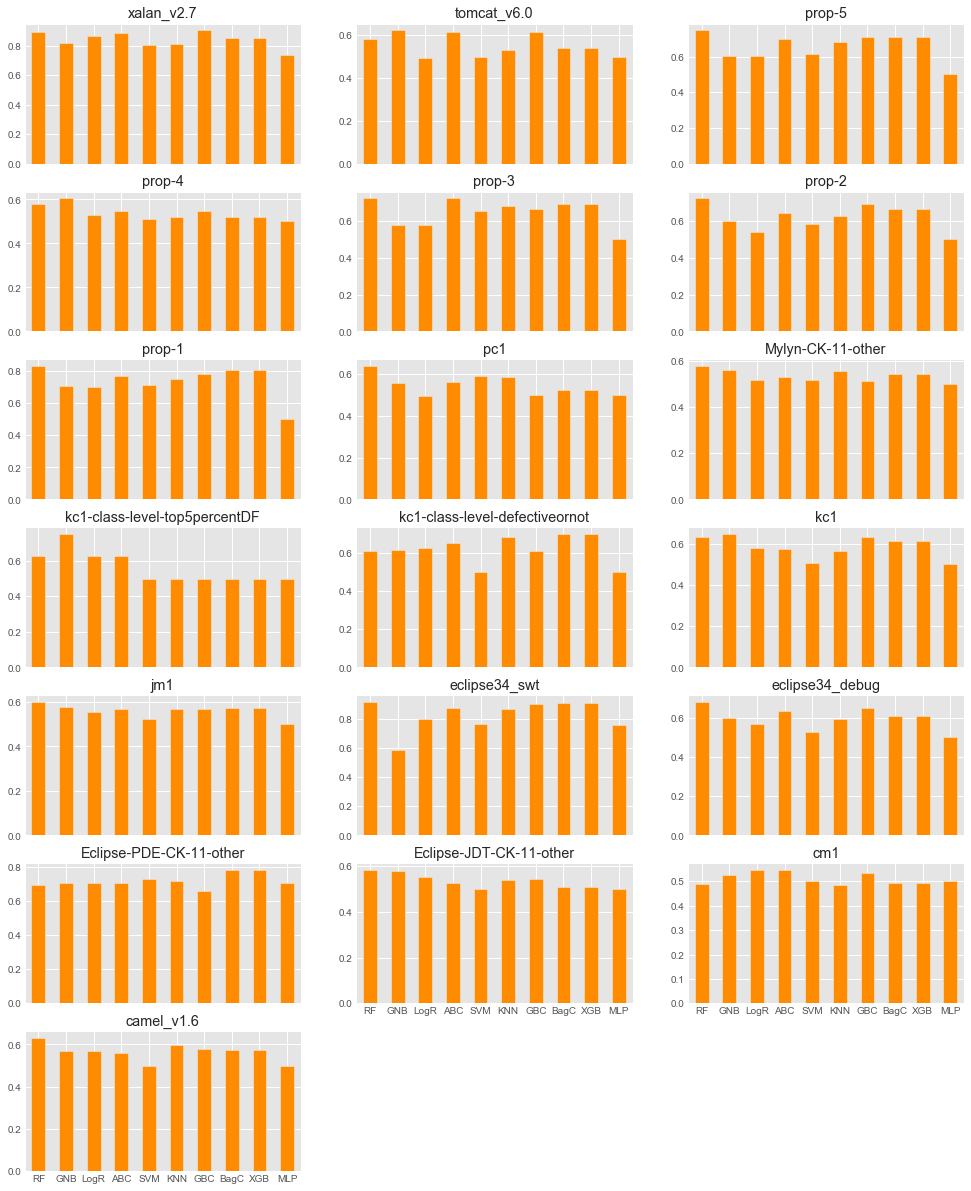

In [100]:
plt.style.use('ggplot')
ax = acc_df.set_index('Dataset Name').T.plot.bar(subplots=True, figsize=(15,60), layout=(21,3), legend=False, color='darkorange', rot=0)

In [110]:
mx = -1
val = ''

for i in range(19):
    mn = f1_df.iloc[i][:-1].mean()
    if mx < mn:
        mx = mn
        val = f1_df.iloc[i]['Dataset Name']

print(mx)
print(val)

0.840298330360698
xalan_v2.7


In [154]:
mx = -1
val = ''

for i in range(19):
    mn = acc_df.iloc[i][:-1].mean()
    if mx < mn:
        mx = mn
        val = acc_df.iloc[i]['Dataset Name']

print(mx)
print(val)

print(auc_df[auc_df['Dataset Name']=='xalan_v2.7'].values[:,:-1].mean())

0.8419949670253384
xalan_v2.7
0.8656903765690377


In [155]:
mx = -1
val = ''

for i in range(19):
    mn = auc_df.iloc[i][:-1].mean()
    if mx < mn:
        mx = mn
        val = auc_df.iloc[i]['Dataset Name']

print(mx)
print(val)

print(f1_df[f1_df['Dataset Name']=='tomcat_v6.0'].values[:,:-1].mean())
print(acc_df[acc_df['Dataset Name']=='tomcat_v6.0'].values[:,:-1].mean())

0.9390557939914164
tomcat_v6.0
0.5602896558766151
0.5541289592760181


In [40]:
for i in range(19):
    print(auc_df.iloc[i]['Dataset Name'])
    print(auc_df.iloc[i][:-1]==auc_df.iloc[i][:-1].max())
    print(auc_df.iloc[i][:-1].max())

xalan_v2.7
RF       True
GNB     False
LogR    False
ABC     False
SVM     False
KNN     False
GBC     False
BagC    False
XGB     False
MLP     False
Name: 0, dtype: bool
0.9330543933054394
tomcat_v6.0
RF       True
GNB     False
LogR    False
ABC     False
SVM     False
KNN     False
GBC     False
BagC    False
XGB     False
MLP     False
Name: 1, dtype: bool
0.9527896995708155
prop-5
RF       True
GNB     False
LogR    False
ABC     False
SVM     False
KNN     False
GBC     False
BagC    False
XGB     False
MLP     False
Name: 2, dtype: bool
0.8219373219373219
prop-4
RF       True
GNB     False
LogR    False
ABC     False
SVM     False
KNN     False
GBC     False
BagC    False
XGB     False
MLP     False
Name: 3, dtype: bool
0.9232111692844677
prop-3
RF       True
GNB     False
LogR    False
ABC     False
SVM     False
KNN     False
GBC     False
BagC    False
XGB     False
MLP     False
Name: 4, dtype: bool
0.8975409836065574
prop-2
RF       True
GNB     False
LogR    False
ABC    

In [41]:
for i in range(19):
    print(cnt_df.iloc[i]['Dataset Name'])
    print(cnt_df.iloc[i][:-1]==cnt_df.iloc[i][:-1].max())
    print(cnt_df.iloc[i][:-1].max())

xalan_v2.7
RF      True
GNB     True
LogR    True
ABC     True
SVM     True
KNN     True
GBC     True
BagC    True
XGB     True
MLP     True
Name: 0, dtype: bool
0
tomcat_v6.0
RF      True
GNB     True
LogR    True
ABC     True
SVM     True
KNN     True
GBC     True
BagC    True
XGB     True
MLP     True
Name: 1, dtype: bool
0
prop-5
RF      True
GNB     True
LogR    True
ABC     True
SVM     True
KNN     True
GBC     True
BagC    True
XGB     True
MLP     True
Name: 2, dtype: bool
0
prop-4
RF      True
GNB     True
LogR    True
ABC     True
SVM     True
KNN     True
GBC     True
BagC    True
XGB     True
MLP     True
Name: 3, dtype: bool
0
prop-3
RF      True
GNB     True
LogR    True
ABC     True
SVM     True
KNN     True
GBC     True
BagC    True
XGB     True
MLP     True
Name: 4, dtype: bool
0
prop-2
RF      True
GNB     True
LogR    True
ABC     True
SVM     True
KNN     True
GBC     True
BagC    True
XGB     True
MLP     True
Name: 5, dtype: bool
0
prop-1
RF      True
GNB     Tru

In [47]:
for i in cnt_df['Dataset Name'].index:
    print(cnt_df.iloc[i]['Dataset Name'])
    print(auc_df.iloc[i][:-1].max())
    print(acc_df.iloc[i][:-1].max())
    print(f1_df.iloc[i][:-1].max())
    print(cnt_df.iloc[i][:-1].max())

xalan_v2.7
0.9330543933054394
0.9050242971190559
0.911954319395837
170
tomcat_v6.0
0.9527896995708155
0.6236802413273
0.6433533498174968
4
prop-5
0.8219373219373219
0.747755943107001
0.7634790015175079
114
prop-4
0.9232111692844677
0.6059523809523809
0.623733583489681
12
prop-3
0.8975409836065574
0.7228173286567448
0.765807962529274
36
prop-2
0.9131313131313131
0.7239341647331787
0.7670231280305602
30
prop-1
0.8487738419618529
0.8311818181818181
0.8315020133145549
216
pc1
0.9144144144144144
0.6376237623762376
0.6705459657892681
6
Mylyn-CK-11-other
0.8605898123324397
0.5783304745568897
0.5976103726922999
12
kc1-class-level-top5percentDF
0.9310344827586207
0.75
0.8141025641025641
2
kc1-class-level-defectiveornot
0.6896551724137931
0.696969696969697
0.6836363636363636
8
kc1
0.8554502369668247
0.6460771030915138
0.6600311850311851
27
jm1
0.8290441176470589
0.5991302107005465
0.6186301062554478
95
eclipse34_swt
0.9225589225589226
0.9151709401709401
0.9182748100735777
112
eclipse34_debug
0.8

In [77]:
import os, numpy as np
from __future__ import print_function
def get():
    print('[',end='')
    for folder, subfolder, filenames in os.walk('.'):
        for filename in filenames:
            if "norm-baseline.csv" in filename and ('iforest' in filename or 'hstrees' in filename):
                pt = os.path.join(folder,filename)
                try:
                    print('[\'' + str(pt.split('/')[1]) + '\',' + str(np.genfromtxt(pt, delimiter=',')[:,-1].max()) + '],',end='')
                except IndexError:
                    print('[\'' + str(pt.split('/')[1]) + '\',' + '\'NA\'' + '],',end='')
    print(']',end='')

In [78]:
cs_aad = [['kc1',146.0],['kc1',144.0],['pc1',29.0],['pc1',22.0],['kc1-class-level-top5percentDF',2.0],['kc1-class-level-top5percentDF',3.0],['cm1',9.0],['cm1',12.0],['kc1-class-level-defectiveornot',40.0],['kc1-class-level-defectiveornot',41.0],['eclipse34_debug',116.0],['eclipse34_debug',116.0],['eclipse34_swt',531.0],['eclipse34_swt',539.0],['Eclipse-JDT-CK-11-other',80.0],['Eclipse-JDT-CK-11-other',66.0],['Eclipse-PDE-CK-11-other',72.0],['Eclipse-PDE-CK-11-other',78.0],['Mylyn-CK-11-other',89.0],['Mylyn-CK-11-other',79.0],['prop-4',60.0],['prop-4',53.0],['tomcat_v6.0',25.0],['tomcat_v6.0',21.0],['prop-2',158.0],['prop-2',75.0],['camel_v1.6',70.0],['camel_v1.6',58.0],['prop-3',152.0],['prop-3',145.0],['xalan_v2.7',803.0],['xalan_v2.7',839.0],['prop-1',835.0],['prop-5',473.0],['prop-5',523.0],['jm1',835.0]]
cs_aad = np.array(cs_aad)
cs_aad

array([['kc1', '146.0'],
       ['kc1', '144.0'],
       ['pc1', '29.0'],
       ['pc1', '22.0'],
       ['kc1-class-level-top5percentDF', '2.0'],
       ['kc1-class-level-top5percentDF', '3.0'],
       ['cm1', '9.0'],
       ['cm1', '12.0'],
       ['kc1-class-level-defectiveornot', '40.0'],
       ['kc1-class-level-defectiveornot', '41.0'],
       ['eclipse34_debug', '116.0'],
       ['eclipse34_debug', '116.0'],
       ['eclipse34_swt', '531.0'],
       ['eclipse34_swt', '539.0'],
       ['Eclipse-JDT-CK-11-other', '80.0'],
       ['Eclipse-JDT-CK-11-other', '66.0'],
       ['Eclipse-PDE-CK-11-other', '72.0'],
       ['Eclipse-PDE-CK-11-other', '78.0'],
       ['Mylyn-CK-11-other', '89.0'],
       ['Mylyn-CK-11-other', '79.0'],
       ['prop-4', '60.0'],
       ['prop-4', '53.0'],
       ['tomcat_v6.0', '25.0'],
       ['tomcat_v6.0', '21.0'],
       ['prop-2', '158.0'],
       ['prop-2', '75.0'],
       ['camel_v1.6', '70.0'],
       ['camel_v1.6', '58.0'],
       ['prop-3', '152.0

In [83]:
cs_bs_aad = np.array([['kc1',136.0],['pc1',22.0],['kc1-class-level-top5percentDF',2.0],['cm1',14.0],['kc1-class-level-defectiveornot',33.0],['eclipse34_debug',116.0],['eclipse34_swt',379.0],['Eclipse-JDT-CK-11-other',53.0],['Eclipse-PDE-CK-11-other',82.0],['Mylyn-CK-11-other',75.0],['prop-4',45.0],['tomcat_v6.0',19.0],['prop-2',88.0],['camel_v1.6',54.0],['prop-3',91.0],['xalan_v2.7',776.0],['prop-1',482.0],['prop-5',324.0],['jm1',780.0],])
cs_bs_aad[cs_bs_aad[:,1]!='NA']

array([['kc1', '136.0'],
       ['pc1', '22.0'],
       ['kc1-class-level-top5percentDF', '2.0'],
       ['cm1', '14.0'],
       ['kc1-class-level-defectiveornot', '33.0'],
       ['eclipse34_debug', '116.0'],
       ['eclipse34_swt', '379.0'],
       ['Eclipse-JDT-CK-11-other', '53.0'],
       ['Eclipse-PDE-CK-11-other', '82.0'],
       ['Mylyn-CK-11-other', '75.0'],
       ['prop-4', '45.0'],
       ['tomcat_v6.0', '19.0'],
       ['prop-2', '88.0'],
       ['camel_v1.6', '54.0'],
       ['prop-3', '91.0'],
       ['xalan_v2.7', '776.0'],
       ['prop-1', '482.0'],
       ['prop-5', '324.0'],
       ['jm1', '780.0']], dtype='<U30')

In [84]:
auc_df

RF       GNB      LogR       ABC       SVM       KNN       GBC  \
0   0.933054  0.757322  0.907950  0.912134  0.887029  0.857741  0.928870   
1   0.952790  0.884120  0.939914  0.944206  0.948498  0.931330  0.944206   
2   0.821937  0.727920  0.750712  0.797721  0.779202  0.774929  0.796296   
3   0.923211  0.902269  0.916230  0.916230  0.916230  0.919721  0.919721   
4   0.897541  0.817623  0.858607  0.895492  0.891393  0.883197  0.893443   
5   0.913131  0.838384  0.868687  0.890909  0.886869  0.868687  0.901010   
6   0.848774  0.658038  0.758856  0.798365  0.772480  0.764305  0.809264   
7   0.914414  0.891892  0.896396  0.900901  0.914414  0.905405  0.909910   
8   0.857909  0.806971  0.847185  0.839142  0.855228  0.849866  0.836461   
9   0.896552  0.931034  0.896552  0.896552  0.862069  0.862069  0.862069   
10  0.620690  0.655172  0.620690  0.655172  0.620690  0.689655  0.620690   
11  0.853081  0.817536  0.848341  0.843602  0.836493  0.827014  0.853081   
12  0.827665  0.815717  0.823989  0.825827  0.822610  0.801471  0.824449   
13  0.922559  0.663300  0.818182  0.885522  0.723906  0.875421  0.912458   
14  0.821596  0.788732  0.769953  0.774648  0.765258  0.732394  0.802817   
15  0.738462  0.784615  0.769231  0.738462  0.630769  0.753846  0.692308   
16  0.883333  0.840000  0.870000  0.843333  0.866667  0.846667  0.873333   
17  0.900000  0.860000  0.900000  0.900000  0.920000  0.890000  0.880000   
18  0.896414  0.856574  0.892430  0.872510  0.904382  0.872510  0.876494   

        BagC       XGB       MLP                    Dataset Name  
0   0.912134  0.912134  0.648536                      xalan_v2.7  
1   0.948498  0.948498  0.948498                     tomcat_v6.0  
2   0.810541  0.810541  0.719373                          prop-5  
3   0.917976  0.917976  0.916230                          prop-4  
4   0.895492  0.895492  0.842213                          prop-3  
5   0.913131  0.913131  0.870707                          prop-2  
6   0.828338  0.828338  0.659401                          prop-1  
7   0.914414  0.914414  0.909910                             pc1  
8   0.860590  0.860590  0.852547               Mylyn-CK-11-other  
9   0.862069  0.862069  0.862069   kc1-class-level-top5percentDF  
10  0.689655  0.689655  0.620690  kc1-class-level-defectiveornot  
11  0.855450  0.855450  0.836493                             kc1  
12  0.829044  0.829044  0.817555                             jm1  
13  0.915825  0.915825  0.808081                   eclipse34_swt  
14  0.788732  0.788732  0.751174                 eclipse34_debug  
15  0.753846  0.753846  0.784615         Eclipse-PDE-CK-11-other  
16  0.866667  0.866667  0.866667         Eclipse-JDT-CK-11-other  
17  0.910000  0.910000  0.920000                             cm1  
18  0.900398  0.900398  0.908367                      camel_v1.6

In [31]:
def f(params):
    n_estimators = params['n_estimators']
    print(n_estimators)
    clf=RandomForestClassifier(n_estimators=n_estimators, random_state=7)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
#         cnts.append(np.sum(np.in1d(np.where(y_pred==1), np.where(y_test==1))))
#         accuracies.append(metrics.accuracy_score(y_test, y_pred))
#         aucs.append(metrics.roc_auc_score(y_test, y_pred))
#         f1s.append(metrics.f1_score(y_test, y_pred, average='macro'))
    a = metrics.roc_auc_score(y_test, y_pred)
    print(a)
    return -a

In [32]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
np.random.seed(7)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for file in files:
        if 'cm1' in file:
            data = pd.read_csv(path + file, header=None).values
            X_train, X_test, y_train, y_test = train_test_split(data[:,1:], (data[:,0]=='anomaly').astype(int), test_size=0.2)
            from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

            fspace = {
                'n_estimators': hp.choice('n_estimators', range(1,110))
            }
            
            from sklearn.ensemble import RandomForestClassifier

            trials = Trials()
            best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=50, trials=trials)

            print('best:', best)

            print('trials:')
            for trial in trials.trials[:2]:
                print(trial)

91                                                                                                                                                                                                             
0.5423588039867109                                                                                                                                                                                             
26                                                                                                                                                                                                             
0.5008305647840532                                                                                                                                                                                             
94                                                                                                                                                                      

77                                                                                                                                                                                                             
0.5423588039867109                                                                                                                                                                                             
13                                                                                                                                                                                                             
0.5423588039867109                                                                                                                                                                                             
105                                                                                                                                                                     

In [33]:
f({'n_estimators': range(1,110)[4]})

5
0.6079734219269102


-0.6079734219269102